In [307]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
import numpy as np

In [229]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from utils import scenarioc
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.options.display.max_rows = 15


In [230]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

trial = FinCapstone(model_name="SampleDevExample", ticker_list=["NVDA","NFLX","AAPL"], scenario="scenarioc",ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
#trial = FinCapstone(ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "NFLX", "DIS", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=False)
#trial = FinCapstone(encode_workpages=10,model_name="FullScenarioC", scenario="scenarioc", ticker_list_samplesize=200, timespan=timespan, date_from=date_from, reset_status=False)

#trial.run_initial_dataload()
#trial.feature_engineering()


trial.train_status_df["status"] = "INCOMPLETE"
trial.store_status_files()
#trial.feature_encoding(useSample=0.00125)
#trial.train(nb_epoch=200, train_next=1)

# Fetch Data

In [28]:
trial.run_initial_dataload()

2017-07-03 08:02:47.911848 - Fetching 3 tickers
  Fetching AAPL - (3/3) [0 skipped]
2017-07-03 08:02:47.915549 - Fetching Finished


In [29]:
trial.trialconfig_df

,value
property,
modeltrain_status,INCOMPLETE
train_from,2010-02-15 00:00:00
modeltrainmarket_status,INCOMPLETE
model_name,SampleDevExample
train_until,2014-12-31 00:00:00
featureengineer_status,INCOMPLETE
date_from,2009-01-01
test_from,2016-02-15 00:00:00
date_to,2017-07-03


In [30]:
load_raw_frame("NVDA").head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,8.13,8.24,7.83,7.86,26709132
1,2005-01-04,7.92,7.93,7.37,7.49,19765563
2,2005-01-05,7.41,7.65,7.37,7.56,18128199
3,2005-01-06,7.69,7.78,7.43,7.49,14238507
4,2005-01-07,7.50,7.56,7.23,7.34,19077024


In [31]:
load_raw_frame("NFLX").head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,1.78,1.80,1.65,1.70,11465685
1,2005-01-04,1.70,1.71,1.61,1.67,17374532
2,2005-01-05,1.68,1.68,1.58,1.60,12740679
3,2005-01-06,1.60,1.62,1.57,1.58,8273118
4,2005-01-07,1.59,1.65,1.57,1.59,7527016


In [32]:
load_raw_frame("AAPL").head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,4.63,4.65,4.47,4.52,173354034
1,2005-01-04,4.56,4.68,4.50,4.57,274515332
2,2005-01-05,4.60,4.66,4.58,4.61,170210264
3,2005-01-06,4.62,4.64,4.52,4.61,176469496
4,2005-01-07,4.64,4.97,4.62,4.95,558932752


# Feature Engineering

In [33]:
trial.feature_engineering()


2017-07-03 08:02:51.862798 - Feature/Label Engineering - scenarioc - [2009-01-01 ; 2017-07-03] 
  (3/3) - Calculating Labels AAPL
2017-07-03 08:02:51.970953 - Feature/Label Engineering Finished


In [34]:
trial.load_scenarioc_features("NVDA", parseDate=True).set_index("Date").head()

,Close,RSI_60,CHAIKIN_MFLOW_21
Date,,,
2009-01-02,8.71,53.228782,1.000000e-10
2009-01-05,8.87,53.228782,1.000000e-10
2009-01-06,9.17,53.228782,1.000000e-10
2009-01-07,8.62,53.228782,1.000000e-10
2009-01-08,8.40,53.228782,1.000000e-10


In [35]:
trial.load_scenarioc_features("NFLX", parseDate=True).set_index("Date").head()

,Close,RSI_60,CHAIKIN_MFLOW_21
Date,,,
2009-01-02,4.27,62.091503,1.000000e-10
2009-01-05,4.56,62.091503,1.000000e-10
2009-01-06,4.71,62.091503,1.000000e-10
2009-01-07,4.67,62.091503,1.000000e-10
2009-01-08,4.74,62.091503,1.000000e-10


In [36]:
trial.load_scenarioc_features("AAPL", parseDate=True).set_index("Date").head()

,Close,RSI_60,CHAIKIN_MFLOW_21
Date,,,
2009-01-02,12.96,56.57289,1.000000e-10
2009-01-05,13.51,56.57289,1.000000e-10
2009-01-06,13.29,56.57289,1.000000e-10
2009-01-07,13.00,56.57289,1.000000e-10
2009-01-08,13.24,56.57289,1.000000e-10


In [37]:
trial.load_scenarioc_labels("NVDA", parseDate=True).set_index("Date").head()

,RETURN_1,RETURN_30,RETURN_60
Date,,,
2009-01-02,0.0184,-0.1010,0.1320
2009-01-05,0.0338,-0.0936,0.1398
2009-01-06,-0.0600,-0.1908,0.1538
2009-01-07,-0.0255,-0.1172,0.3132
2009-01-08,-0.0560,-0.1357,0.3512


In [38]:
trial.load_scenarioc_labels("NFLX", parseDate=True).set_index("Date").head()

,RETURN_1,RETURN_30,RETURN_60
Date,,,
2009-01-02,0.0679,0.2459,0.4356
2009-01-05,0.0329,0.1601,0.3421
2009-01-06,-0.0085,0.1253,0.3079
2009-01-07,0.0150,0.1263,0.3169
2009-01-08,-0.0274,0.0717,0.3418


In [39]:
trial.load_scenarioc_labels("AAPL", parseDate=True).set_index("Date").head()

,RETURN_1,RETURN_30,RETURN_60
Date,,,
2009-01-02,0.0424,0.0417,0.1590
2009-01-05,-0.0163,-0.0022,0.1495
2009-01-06,-0.0218,-0.0256,0.2114
2009-01-07,0.0185,0.0000,0.2746
2009-01-08,-0.0227,-0.0619,0.2779


# Feature Encoding

In [40]:
trial.feature_encoding(useSample=0.0025, timespan=210, bins=100)


2017-07-03 08:02:55.360330 - F. Encoding - scenarioc - Page None - Timespan 210 - N_BINS 100
3 Tickers - 3106 Dates - Sampling 9318 observations with 0.0025 change
  Last encoding AAPL 2017-07-03 [15 Done] [9297 Skipped] [6 Weekend/Holiday]
2017-07-03 08:03:18.447034 - F. Encoding Finished- Page None


# Train Scenario C

In [231]:
nb_epoch=10
useSample=None
input_shape=(210,210,3)
filter_shape=(3, 3)
output_size=3
FC_layers=4
bins=100
timespan=210

In [232]:
X_train = None
y_train = None
X_test = None
y_test = None
results = None
model = None
batch_size = 32
X_batch = None
y_batch = None
best_loss = None
train_eval = pd.DataFrame(columns=["mse", "r_squared", "accuracy"])
valid_eval = pd.DataFrame(columns=["mse", "r_squared", "accuracy"])

In [233]:
print("Training Scenario C")
print("train_from={}, train_until={}, test_from={}, test_until={}".format(datetime.datetime.strftime(trial.train_from, "%Y-%m-%d"), datetime.datetime.strftime(trial.train_until, "%Y-%m-%d"), datetime.datetime.strftime(trial.test_from, "%Y-%m-%d"), datetime.datetime.strftime(trial.test_until, "%Y-%m-%d")))
print("input_shape={}, filter_shape={}, output_size={}, FC_layers={}".format(input_shape, filter_shape, output_size, FC_layers))
print("\n")


## load all label data and feature contexts for batch loading
_tickers, _dates, _labels = scenarioc.prepare_problemspace(trial.valid_ticker_list(), timespan, bins)

if useSample:
    print(_txickers.shape, _dates.shape)
    _tickers = _tickers[:int(_tickers.shape[0] * useSample)]
    _dates = _dates[:int(_dates.shape[0] * useSample)]
    print(_tickers.shape, _dates.shape)
else:
    useSample = 1.0

    
print("useSample is : {}".format(useSample))

print("\n\n")

print("_ticker var has {} entries.".format(_tickers.shape))
print("_dates var has {} entries".format(_dates.shape))
print("_labels var has {} ticker".format((_labels.keys())))

print("\n\n")

print("_ticker sample: {}".format(_tickers[:10]))
print("_dates sample: {}".format(_dates[:10]))

Training Scenario C
train_from=2010-02-15, train_until=2014-12-31, test_from=2016-02-15, test_until=2016-12-31
input_shape=(210, 210, 3), filter_shape=(3, 3), output_size=3, FC_layers=4


useSample is : 1.0



_ticker var has (72,) entries.
_dates var has (72,) entries
_labels var has dict_keys([]) ticker



_ticker sample: ['NVDA' 'NFLX' 'AAPL' 'AAPL' 'NFLX' 'NFLX' 'AAPL' 'NVDA' 'AAPL' 'NVDA']
_dates sample: [Timestamp('2015-11-16 00:00:00') Timestamp('2012-09-05 00:00:00')
 Timestamp('2014-03-11 00:00:00') Timestamp('2015-09-24 00:00:00')
 Timestamp('2013-08-07 00:00:00') Timestamp('2017-05-16 00:00:00')
 Timestamp('2011-11-02 00:00:00') Timestamp('2012-01-18 00:00:00')
 Timestamp('2011-05-06 00:00:00') Timestamp('2016-10-03 00:00:00')]


/home/pedro/jupyternb/FintechCapstone/FintechCapstone.py:141: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ticker_list = ticker_list[~(self.featureengineer_status_df["status"] == "NOK")]


In [305]:
## Lets slice out the "TEST"
_mask_train = (_dates > pd.to_datetime(trial.train_from)) & (_dates < pd.to_datetime(trial.train_until)) 
#_mask_test = (_dates >= pd.to_datetime(self.test_from))
_tickers_train = _tickers[_mask_train]
_dates_train = _dates[_mask_train]

print("Train Interval: [{} , {}]  Test Interval: [{} , {}]".format(trial.train_from, trial.train_until, trial.test_from, trial.test_until))

print("\nThis map has dates in the train set: \n {}".format(_dates[_mask_train]))
#print("\nThis map has dates in the test set: \n {}".format(_dates[_mask_test]))

print("\nThis map has tickers in the train set: \n {}".format(_tickers[_mask_train]))
#print("\nThis map has in the test set: \n {}".format(_tickers[_mask_test]))

print("Shapes: [mask {}({})] [tickers {}] [dates {}]".format(_mask_train.shape[0], _mask_train.sum(), _tickers_train.shape[0], _dates_train.shape[0]))

Train Interval: [2010-02-15 00:00:00 , 2014-12-31 00:00:00]  Test Interval: [2016-02-15 00:00:00 , 2016-12-31 00:00:00]

This map has dates in the train set: 
 [Timestamp('2012-09-05 00:00:00') Timestamp('2014-03-11 00:00:00')
 Timestamp('2013-08-07 00:00:00') Timestamp('2011-11-02 00:00:00')
 Timestamp('2012-01-18 00:00:00') Timestamp('2011-05-06 00:00:00')
 Timestamp('2012-11-29 00:00:00') Timestamp('2014-11-18 00:00:00')
 Timestamp('2010-06-17 00:00:00') Timestamp('2014-12-23 00:00:00')
 Timestamp('2010-03-08 00:00:00') Timestamp('2014-07-09 00:00:00')
 Timestamp('2012-01-17 00:00:00') Timestamp('2010-11-22 00:00:00')
 Timestamp('2013-06-06 00:00:00') Timestamp('2014-03-21 00:00:00')
 Timestamp('2010-06-24 00:00:00') Timestamp('2014-12-03 00:00:00')
 Timestamp('2013-11-13 00:00:00') Timestamp('2010-07-02 00:00:00')
 Timestamp('2012-03-09 00:00:00') Timestamp('2014-09-23 00:00:00')
 Timestamp('2014-02-12 00:00:00') Timestamp('2011-05-03 00:00:00')
 Timestamp('2014-04-22 00:00:00') Ti

In [306]:
_mask_trainvalid = np.arange(_tickers_train.shape[0])
np.random.shuffle(_mask_trainvalid)
_tickers_train = _tickers_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]
_dates_train = _dates_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]
_tickers_valid = _tickers_train[_mask_trainvalid[:int(np.ceil(_mask_trainvalid.shape[0] * 0.2))]]

print("Shapes: [TICKER {}T {}V] [DATES {}T {}V]".format(_tickers_train.shape[0], _tickers_valid.shape[0], _dates_train.shape[0], _dates_valid.shape[0]))

Shapes: [TICKER 35T 8V] [DATES 35T 8V]


In [278]:
## Lets slice out the "TEST"

# And Split train into train and validation with an 80% 20% split



_tickers_train = _tickers_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]
_dates_train = _dates_train[_mask_trainvalid[:int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]

_tickers_valid = _dates_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]
_dates_valid = _dates_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]

print("Train {} {}".format(_tickers_train, _dates_train))
print("Test {} {}".format(_tickers_valid, _dates_valid))


In [239]:
# And Split train into train and validation with an 80% 20% split
_mask_trainvalid = np.arange(_tickers_train.shape[0])
np.random.shuffle(_mask_trainvalid)

_tickers_train = _tickers_train[_mask_trainvalid[:int(np.ceil(_mask_trainvalid.shape[0] * 0.2))]]
_dates_train = _dates_train[_mask_trainvalid[:int(np.ceil(_mask_trainvalid.shape[0] * 0.2))]]

_tickers_valid = _dates_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]
_dates_valid = _dates_train[_mask_trainvalid[int(np.ceil(_mask_trainvalid.shape[0] * 0.2)):]]

print("Train {} {}".format(_tickers_train, _dates_train))
print("Test {} {}".format(_tickers_valid, _dates_valid))


array([8, 0, 7, 5, 4, 1, 2, 6, 3])

In [ ]:
_arr = np.arange(_tickers_valid.shape[0])
np.random.shuffle(_arr)
_tickers_valid[_arr[:int(np.ceil(_tickers_train.shape[0] * 0.2))]]
_dates_valid[_arr[:int(np.ceil(_tickers_train.shape[0] * 0.2))]]



In [208]:
_tickers_valid

NameError: name '_tickers_valid' is not defined

In [45]:
model = scenarioc.create_model(input_shape, filter_shape, 1, FC_layers)

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 210, 210, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 210, 210, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 105, 105, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 105, 105, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 105, 105, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 52, 52, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 52, 52, 256)       295168    
__________

In [47]:
feature_mean, feature_std = scenarioc.features_stats(_dates_train, _tickers_train, _labels, timespan, bins)
print(feature_mean, feature_std)

0.0834259072803 0.2180864457


In [53]:
print(_dates_train[0:1])
print(_tickers_train[0:1])

[Timestamp('2012-09-05 00:00:00')]
['NFLX']


In [206]:
v = 0

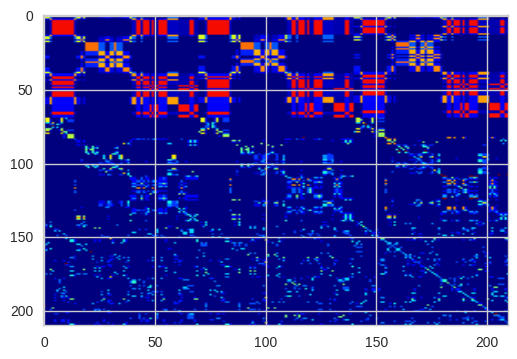

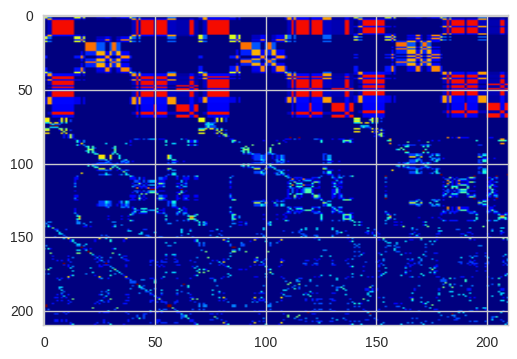

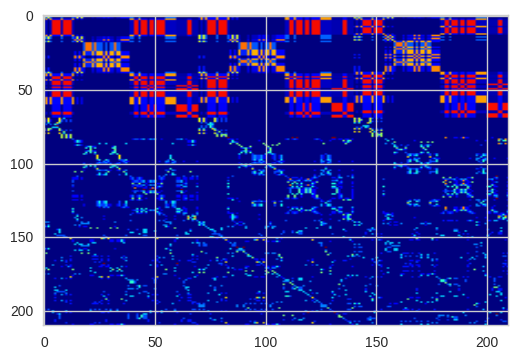

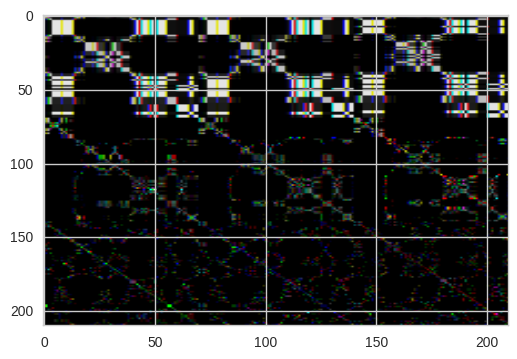

[array([ 0.0306,  0.2471,  0.3834])]
(1, 210, 210, 3)


In [207]:
data_iterator = scenarioc.seq_batch(_dates_train[v:v+1], _tickers_train[v:v+1], _labels, timespan, bins)
x, y = next(data_iterator)
x = np.array(x)
plt.imshow(x[0][:,:,0], cmap="jet", aspect="auto")
plt.show()
plt.imshow(x[0][:,:,1], cmap="jet", aspect="auto")
plt.show()
plt.imshow(x[0][:,:,2], cmap="jet", aspect="auto")
plt.show()
plt.imshow(x[0][:,:,:], cmap="jet", aspect="auto")
plt.show()
print(y)
print(x.shape)

# The first Train Epoch

In [49]:
itr_epoch = 0

In [19]:
_start = datetime.datetime.now()

  Epoch 0 - TRAINING 

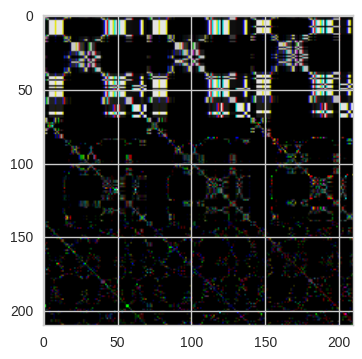

[ 0.0306  0.2471  0.3834]


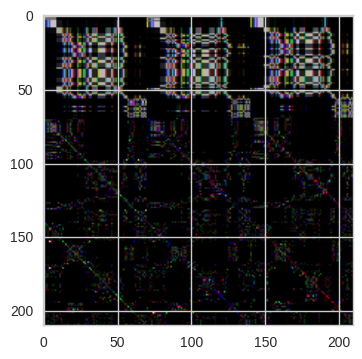

[ 0.0123  0.068   0.0289]


In [57]:
print_progress("  Epoch {} - TRAINING ".format(itr_epoch))

scenarioc.train(model, _dates_train, _tickers_train, _labels, timespan, bins, feature_mean, feature_std)

  Epoch 0 - EVAL. TRAIN 

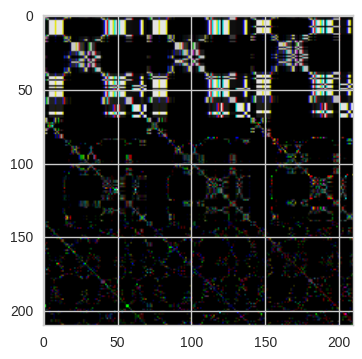

[ 0.0306  0.2471  0.3834]


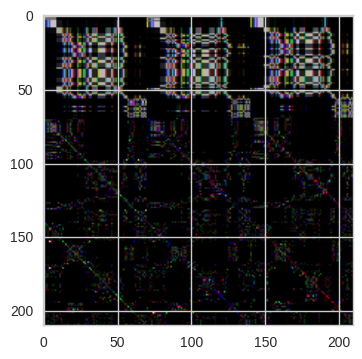

[ 0.0123  0.068   0.0289]
  Epoch 0 - EVAL. TEST 

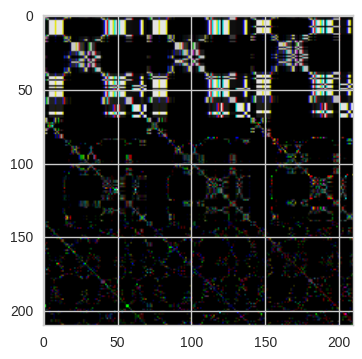

[ 0.0306  0.2471  0.3834]


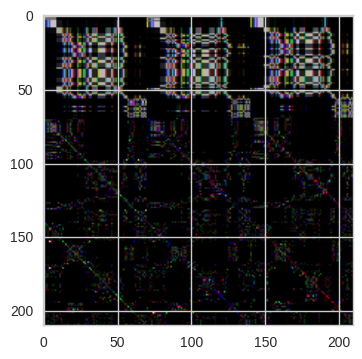

[ 0.0123  0.068   0.0289]


In [58]:
print_progress("  Epoch {} - EVAL. TRAIN ".format(itr_epoch))
train_eval = scenarioc.evaluate(model, _dates_train, _tickers_train, _labels, timespan, bins, feature_mean, feature_std)
print_progress("  Epoch {} - EVAL. TEST ".format(itr_epoch))
valid_eval = scenarioc.evaluate(model, _dates_train, _tickers_train, _labels, timespan, bins, feature_mean, feature_std)



In [23]:
trial.eval_status_df.loc[("Nan", itr_epoch), "status"] = "COMPLETE"
trial.eval_status_df.loc[("Nan", itr_epoch), "start"] = _start
trial.eval_status_df.loc[("Nan", itr_epoch), "end"] = datetime.datetime.now()
trial.eval_status_df.loc[("Nan", itr_epoch), "mse"] = train_eval["mse"]
trial.eval_status_df.loc[("Nan", itr_epoch), "r_squared"] = train_eval["r_squared"]
trial.eval_status_df.loc[("Nan", itr_epoch), "accuracy"] = train_eval["accuracy"]
trial.eval_status_df.loc[("Nan", itr_epoch), "mse_test"] = valid_eval["mse"]
trial.eval_status_df.loc[("Nan", itr_epoch), "r_squared_test"] = valid_eval["r_squared"]
trial.eval_status_df.loc[("Nan", itr_epoch), "accuracy_test"] = valid_eval["accuracy"]

trial.store_status_files()


In [24]:
best_loss = None

if best_loss is None:
    best_loss = [itr_epoch, valid_eval["mse"]]
    print_progress("  Epoch {} - DUMP WEIGTHS ".format(itr_epoch))
    #model.save_weights("{}/weights{}_{}_{}_step{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample, itr_epoch))
    #model.save_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample))
else:
    if valid_eval["mse"] < best_loss[1]:
        best_loss = [itr_epoch, valid_eval["mse"]]

        print_progress("  Epoch {} - DUMP WEIGTHS ".format(itr_epoch))
        #model.save_weights("{}/weights{}_{}_{}_step{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample, itr_epoch))
        #model.save_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample))


    if (itr_epoch - best_loss[0]) > 5:
        print("Not improving for 5 epochs. Stopping.")
        #break;
print_progress("  Epoch {} - [M, R, A] - [{:.6f},{:.6f},{:.6f}] [{:.6f},{:.6f},{:.6f}] {} ".format(itr_epoch, train_eval["mse"], train_eval["r_squared"], train_eval["accuracy"], valid_eval["mse"], valid_eval["r_squared"], valid_eval["accuracy"], ("*" if itr_epoch - best_loss[0] == 0 else "")))
print("\n")

  Epoch 0 - [M, R, A] - [0.027028,-0.307720,0.527778] [0.027028,-0.307720,0.527778] * 



# The real train Loop

In [ ]:
for itr_epoch in range(nb_epoch):
    _start = datetime.datetime.now()
    print_progress("  Epoch {} - TRAINING ".format(itr_epoch))

    scenarioc.train(model, _dates_train, _tickers_train, _labels, trial.model_name, feature_mean, feature_std)

    print_progress("  Epoch {} - EVAL. TRAIN ".format(itr_epoch))
    train_eval = scenarioc.evaluate(model, _dates_train, _tickers_train, _labels, trial.model_name, feature_mean, feature_std)
    print_progress("  Epoch {} - EVAL. TEST ".format(itr_epoch))
    valid_eval = scenarioc.evaluate(model, _dates_test, _tickers_test, _labels, trial.model_name, feature_mean, feature_std)

    trial.eval_status_df.loc[("Nan", itr_epoch), "status"] = "COMPLETE"
    trial.eval_status_df.loc[("Nan", itr_epoch), "start"] = _start
    trial.eval_status_df.loc[("Nan", itr_epoch), "end"] = datetime.datetime.now()
    trial.eval_status_df.loc[("Nan", itr_epoch), "mse"] = train_eval["mse"]
    trial.eval_status_df.loc[("Nan", itr_epoch), "r_squared"] = train_eval["r_squared"]
    trial.eval_status_df.loc[("Nan", itr_epoch), "accuracy"] = train_eval["accuracy"]
    trial.eval_status_df.loc[("Nan", itr_epoch), "mse_test"] = valid_eval["mse"]
    trial.eval_status_df.loc[("Nan", itr_epoch), "r_squared_test"] = valid_eval["r_squared"]
    trial.eval_status_df.loc[("Nan", itr_epoch), "accuracy_test"] = valid_eval["accuracy"]

    trial.store_status_files()


    if best_loss is None:
        best_loss = [itr_epoch, valid_eval["mse"]]
        print_progress("  Epoch {} - DUMP WEIGTHS ".format(itr_epoch))
        #model.save_weights("{}/weights{}_{}_{}_step{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample, itr_epoch))
        #model.save_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample))
    else:
        if valid_eval["mse"] < best_loss[1]:
            best_loss = [itr_epoch, valid_eval["mse"]]

            print_progress("  Epoch {} - DUMP WEIGTHS ".format(itr_epoch))
            #model.save_weights("{}/weights{}_{}_{}_step{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample, itr_epoch))
            #model.save_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, self.scenario, self.model_name, useSample))


        if (itr_epoch - best_loss[0]) > 5:
            print("Not improving for 5 epochs. Stopping.")
            break;
    print_progress("  Epoch {} - [M, R, A] - [{:.6f},{:.6f},{:.6f}] [{:.6f},{:.6f},{:.6f}] {} ".format(itr_epoch, train_eval["mse"], train_eval["r_squared"], train_eval["accuracy"], valid_eval["mse"], valid_eval["r_squared"], valid_eval["accuracy"], ("*" if itr_epoch - best_loss[0] == 0 else "")))
    print("\n")

# Real FULL Training

In [21]:
trial.train_scenarioc(nb_epoch=100, earlystop=10)

Training Scenario C
train_from=2010-02-15, train_until=2014-12-31, test_from=2016-02-15, test_until=2016-12-31
input_shape=(224, 224, 3), bins=100, filter_shape=(3, 3), output_size=3, FC_layers=4
sample=None, earlystop=10




KeyError: 'CERN'

# Finetuning

In [22]:
trial.train_scenarioc(finetune="SampleDevExample", dropout=0.3, optimizer="adagrad")

# Validating prepare_problemspace

In [137]:
ticker_list = trial.valid_ticker_list()
timespan = 224
bins = 100
## Load the labels for every ticker
_labels = dict()


In [139]:
for itr_ticker in ticker_list:
    _labels[itr_ticker] = scenarioc.load_scenarioc_labels(itr_ticker, True)
    _labels[itr_ticker].set_index("Date", inplace=True)
    
_labels

{'AAPL':                 RETURN_1     RETURN_30     RETURN_60
 Date                                                
 2009-01-02  4.240000e-02  4.170000e-02  1.590000e-01
 2009-01-05 -1.630000e-02 -2.200000e-03  1.495000e-01
 2009-01-06 -2.180000e-02 -2.560000e-02  2.114000e-01
 2009-01-07  1.850000e-02  0.000000e+00  2.746000e-01
 2009-01-08 -2.270000e-02 -6.190000e-02  2.779000e-01
 2009-01-09 -2.090000e-02 -3.900000e-03  2.697000e-01
 2009-01-12 -1.100000e-02  2.760000e-02  3.118000e-01
 ...                  ...           ...           ...
 2017-06-15 -1.400000e-02  1.000000e-10  1.000000e-10
 2017-06-16  2.860000e-02  1.000000e-10  1.000000e-10
 2017-06-19 -9.100000e-03  1.000000e-10  1.000000e-10
 2017-06-20  5.900000e-03  1.000000e-10  1.000000e-10
 2017-06-21 -1.600000e-03  1.000000e-10  1.000000e-10
 2017-06-22  4.500000e-03  1.000000e-10  1.000000e-10
 2017-06-23  1.000000e-10  1.000000e-10  1.000000e-10
 
 [2133 rows x 3 columns],
 'NFLX':                 RETURN_1     RETURN_3

In [141]:
import glob 
## Look into disk and list all TICKERS and DATES encodings
listing = glob.glob('./data/D_TRIALA/*_{}_{}.npy'.format(timespan, bins))
rx = "MTFIELD_(.*)_(\d{4}-\d{2}-\d{2})_" + str(timespan) + "_" + str(bins) + ".npy".format(timespan, bins)

In [143]:
listing[:10]

['./data/D_TRIALA/MTFIELD_IDXX_2016-01-22_224_100.npy',
 './data/D_TRIALA/MTFIELD_CERN_2014-07-15_224_100.npy',
 './data/D_TRIALA/MTFIELD_IDXX_2012-04-03_224_100.npy',
 './data/D_TRIALA/MTFIELD_CELG_2016-08-11_224_100.npy',
 './data/D_TRIALA/MTFIELD_STX_2013-10-04_224_100.npy',
 './data/D_TRIALA/MTFIELD_FISV_2012-01-05_224_100.npy',
 './data/D_TRIALA/MTFIELD_PCAR_2013-04-03_224_100.npy',
 './data/D_TRIALA/MTFIELD_AMAT_2012-01-26_224_100.npy',
 './data/D_TRIALA/MTFIELD_CTRP_2015-05-04_224_100.npy',
 './data/D_TRIALA/MTFIELD_CTXS_2013-08-26_224_100.npy']

In [145]:
rx

'MTFIELD_(.*)_(\\d{4}-\\d{2}-\\d{2})_224_100.npy'

In [147]:
import re
_tickers = np.array([ re.search(rx, x).group(1) for x in listing ])
_dates = np.array([ pd.to_datetime(re.search(rx, x).group(2)) for x in listing ])


In [415]:
features_df = scenarioc.load_scenarioc_features("AAPL", True)
features_df

,Date,Close,RSI_60,CHAIKIN_MFLOW_21
0,2009-01-02,12.96,56.572890,1.000000e-10
1,2009-01-05,13.51,56.572890,1.000000e-10
2,2009-01-06,13.29,56.572890,1.000000e-10
3,2009-01-07,13.00,56.572890,1.000000e-10
4,2009-01-08,13.24,56.572890,1.000000e-10
5,2009-01-09,12.94,56.572890,1.000000e-10
6,2009-01-12,12.67,56.572890,1.000000e-10
...,...,...,...,...
2126,2017-06-15,144.29,53.868438,2.481352e-02
2127,2017-06-16,142.27,52.156664,1.247710e-02


In [416]:
labels_df = scenarioc.load_scenarioc_labels("AAPL", True)
labels_df

,Date,RETURN_1,RETURN_30,RETURN_60
0,2009-01-02,4.240000e-02,4.170000e-02,1.590000e-01
1,2009-01-05,-1.630000e-02,-2.200000e-03,1.495000e-01
2,2009-01-06,-2.180000e-02,-2.560000e-02,2.114000e-01
3,2009-01-07,1.850000e-02,0.000000e+00,2.746000e-01
4,2009-01-08,-2.270000e-02,-6.190000e-02,2.779000e-01
5,2009-01-09,-2.090000e-02,-3.900000e-03,2.697000e-01
6,2009-01-12,-1.100000e-02,2.760000e-02,3.118000e-01
...,...,...,...,...
2126,2017-06-15,-1.400000e-02,1.000000e-10,1.000000e-10
2127,2017-06-16,2.860000e-02,1.000000e-10,1.000000e-10


In [417]:
predictions_df = pd.DataFrame()
predictions_df["Date"] = labels_df["Date"].copy()
predictions_df = pd.concat([predictions_df, np.multiply(labels_df.iloc[:,1:], np.random.rand(2133,3))], axis=1)
predictions_df

,Date,RETURN_1,RETURN_30,RETURN_60
0,2009-01-02,2.786251e-02,8.606539e-03,1.575644e-01
1,2009-01-05,-1.293043e-02,-1.097218e-03,1.162484e-01
2,2009-01-06,-1.803377e-02,-2.385908e-02,1.674824e-01
3,2009-01-07,1.215485e-02,0.000000e+00,2.326283e-01
4,2009-01-08,-1.100318e-02,-1.037169e-02,1.603308e-02
5,2009-01-09,-8.293219e-03,-6.797445e-04,1.884812e-01
6,2009-01-12,-6.716572e-03,2.640738e-02,6.080711e-02
...,...,...,...,...
2126,2017-06-15,-1.497108e-03,5.278390e-11,7.491997e-13
2127,2017-06-16,6.099663e-03,1.986493e-11,6.179021e-11


In [418]:
futureprices_df = pd.DataFrame(
    data=predictions_df.iloc[:,1:].apply(lambda x : x * features_df["Close"]).values,
    columns=["CLOSE_1", "CLOSE_30", "CLOSE_60"])

futureprices_df

,CLOSE_1,CLOSE_30,CLOSE_60
0,3.610981e-01,1.115408e-01,2.042034e+00
1,-1.746901e-01,-1.482341e-02,1.570516e+00
2,-2.396688e-01,-3.170871e-01,2.225841e+00
3,1.580131e-01,0.000000e+00,3.024168e+00
4,-1.456821e-01,-1.373212e-01,2.122780e-01
5,-1.073142e-01,-8.795893e-03,2.438946e+00
6,-8.509896e-02,3.345816e-01,7.704260e-01
...,...,...,...
2126,-2.160178e-01,7.616188e-09,1.081020e-10
2127,8.677991e-01,2.826183e-09,8.790894e-09


In [419]:
predictions_df = pd.concat([predictions_df, futureprices_df], axis=1)
predictions_df

,Date,RETURN_1,RETURN_30,RETURN_60,CLOSE_1,CLOSE_30,CLOSE_60
0,2009-01-02,2.786251e-02,8.606539e-03,1.575644e-01,3.610981e-01,1.115408e-01,2.042034e+00
1,2009-01-05,-1.293043e-02,-1.097218e-03,1.162484e-01,-1.746901e-01,-1.482341e-02,1.570516e+00
2,2009-01-06,-1.803377e-02,-2.385908e-02,1.674824e-01,-2.396688e-01,-3.170871e-01,2.225841e+00
3,2009-01-07,1.215485e-02,0.000000e+00,2.326283e-01,1.580131e-01,0.000000e+00,3.024168e+00
4,2009-01-08,-1.100318e-02,-1.037169e-02,1.603308e-02,-1.456821e-01,-1.373212e-01,2.122780e-01
5,2009-01-09,-8.293219e-03,-6.797445e-04,1.884812e-01,-1.073142e-01,-8.795893e-03,2.438946e+00
6,2009-01-12,-6.716572e-03,2.640738e-02,6.080711e-02,-8.509896e-02,3.345816e-01,7.704260e-01
...,...,...,...,...,...,...,...
2126,2017-06-15,-1.497108e-03,5.278390e-11,7.491997e-13,-2.160178e-01,7.616188e-09,1.081020e-10
2127,2017-06-16,6.099663e-03,1.986493e-11,6.179021e-11,8.677991e-01,2.826183e-09,8.790894e-09


In [420]:
dates_missing = pd.DataFrame(pd.date_range(predictions_df["Date"].max(), periods=60, freq='B').values, columns=["Date"])

In [421]:
predictions_df = pd.concat([predictions_df, dates_missing], axis=0)
predictions_df

,CLOSE_1,CLOSE_30,CLOSE_60,Date,RETURN_1,RETURN_30,RETURN_60
0,0.361098,0.111541,2.042034,2009-01-02,0.027863,0.008607,0.157564
1,-0.174690,-0.014823,1.570516,2009-01-05,-0.012930,-0.001097,0.116248
2,-0.239669,-0.317087,2.225841,2009-01-06,-0.018034,-0.023859,0.167482
3,0.158013,0.000000,3.024168,2009-01-07,0.012155,0.000000,0.232628
4,-0.145682,-0.137321,0.212278,2009-01-08,-0.011003,-0.010372,0.016033
5,-0.107314,-0.008796,2.438946,2009-01-09,-0.008293,-0.000680,0.188481
6,-0.085099,0.334582,0.770426,2009-01-12,-0.006717,0.026407,0.060807
...,...,...,...,...,...,...,...
53,NaN,NaN,NaN,2017-09-06,NaN,NaN,NaN
54,NaN,NaN,NaN,2017-09-07,NaN,NaN,NaN


In [422]:
predictions_df["CLOSE_1"] = predictions_df["CLOSE_1"].shift(1)
predictions_df["CLOSE_30"] = predictions_df["CLOSE_30"].shift(30)
predictions_df["CLOSE_60"] = predictions_df["CLOSE_60"].shift(60)
predictions_df

,CLOSE_1,CLOSE_30,CLOSE_60,Date,RETURN_1,RETURN_30,RETURN_60
0,NaN,NaN,NaN,2009-01-02,0.027863,0.008607,0.157564
1,0.361098,NaN,NaN,2009-01-05,-0.012930,-0.001097,0.116248
2,-0.174690,NaN,NaN,2009-01-06,-0.018034,-0.023859,0.167482
3,-0.239669,NaN,NaN,2009-01-07,0.012155,0.000000,0.232628
4,0.158013,NaN,NaN,2009-01-08,-0.011003,-0.010372,0.016033
5,-0.145682,NaN,NaN,2009-01-09,-0.008293,-0.000680,0.188481
6,-0.107314,NaN,NaN,2009-01-12,-0.006717,0.026407,0.060807
...,...,...,...,...,...,...,...
53,NaN,NaN,1.081020e-10,2017-09-06,NaN,NaN,NaN
54,NaN,NaN,8.790894e-09,2017-09-07,NaN,NaN,NaN
